In [16]:
import os 
import tensorflow 
from PIL import Image, ImageDraw
from rembg import remove 
import math
import time 


In [17]:
folder_sources = []
Orig_Dataset_path = "Segmented Herbal Leaf images"
New_Dataset_path = "Transformed"

for file in os.listdir(Orig_Dataset_path):
    folder_sources.append(file)
        
print(folder_sources)

['Artocarpus Heterophyllus (Jackfruit)', 'Blumea Balsamifera (Sambong)', 'Citrus Limon (Lemon)', 'Jasminum (Jasmine)', 'Mentha (Mint)', 'Momordica Charantia (Ampalaya)', 'Moringa Oleifera (Malunggay)', 'Vitex Negundo (Lagundi)']


In [18]:
for folder in folder_sources:
    os.mkdir(os.path.join(New_Dataset_path, folder))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Transformed\\Artocarpus Heterophyllus (Jackfruit)'

In [19]:
current_source = folder_sources[0]
current_set_of_images = os.listdir(os.path.join(Orig_Dataset_path, current_source))
current_image = current_set_of_images[0]

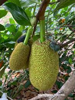

((75, 100), 100)

In [20]:
prev_im = Image.open(os.path.join(Orig_Dataset_path, current_source, current_image))
prev_im.thumbnail((100, 100))
display(prev_im)
max_dim = max(prev_im.size)
prev_im.size, max(prev_im.size)

Orig Image Dimensions -> Height: 100 Width: 75
Rotated Image Dimensions -> Height: 126 Width: 115
Old Coords of Bounding Box (Picture Focus Only): [(0, 0), (75, 0), (75, 100), (0, 100)]
New Coords After rotation: [(-19.975952641916447, 25.44872981077806), (44.97595264191645, -12.051270189221935), (94.97595264191645, 74.55127018922194), (30.024047358083546, 112.05127018922194)]
Excess Values (For Negative Fixes): -19.975952641916447 -12.051270189221935 94.97595264191645 112.05127018922194
19.975952641916447 13.948729810778062
Fixed Coords (Fixed Negative Values) [(0.0, 39.39745962155612), (64.9519052838329, 1.897459621556127), (114.9519052838329, 88.5), (49.99999999999999, 126.0)]


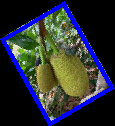

(115, 126)

In [21]:
x0 = 0
y0 = 0
x1 = prev_im.size[0]
y1 = prev_im.size[1]
image_width = prev_im.size[0]
image_height = prev_im.size[1]

degrees_ = 30
prev_im_copy = prev_im.copy()
prev_im_copy = prev_im_copy.rotate(degrees_, expand=True)
rot_im_width, rot_im_height = prev_im_copy.size


degrees = math.radians(degrees_)
def calculate_new_x(degrees, x, y): return image_width / 2 + (x - image_width/2) * math.cos(degrees) + (y-image_height/2) * math.sin(degrees)
def calculate_new_y(degrees, x, y): return image_height / 2 - (x - image_width/2) * math.sin(degrees) + (y-image_height/2) * math.cos(degrees) 

coords = [(x0, y0), (x1, y0), (x1, y1), (x0, y1)]
new_coords = []

smallest_x = 0
smallest_y = 0
largest_x = 1
largest_y = 1

for x, y in coords:
    _x = calculate_new_x(degrees, x, y)
    _y = calculate_new_y(degrees, x, y)
    new_coords.append((_x, _y))
    smallest_x = min(smallest_x, _x)
    smallest_y = min(smallest_y, _y)
    largest_x = max(largest_x, _x)
    largest_y = max(largest_y, _y)


fixed_coords = []


excess_x = 0 - smallest_x 
excess_y = rot_im_height - largest_y

print("Orig Image Dimensions -> Height:", image_height, "Width:", image_width)
print("Rotated Image Dimensions -> Height:", rot_im_height, "Width:", rot_im_width)
print("Old Coords of Bounding Box (Picture Focus Only):", coords)
print("New Coords After rotation:", new_coords)
print("Excess Values (For Negative Fixes):", smallest_x, smallest_y, largest_x, largest_y)
print(excess_x, excess_y)

for _x, _y in new_coords:
    fixed_coords.append((_x+excess_x, _y+excess_y))

print("Fixed Coords (Fixed Negative Values)", fixed_coords)



border_width = 5
d = ImageDraw.Draw(prev_im_copy)

# # d.line(new_coords, fill="red", width=border_width)
# # d.polygon(new_coords, width=border_width, outline="red")
d.polygon(fixed_coords, width=border_width, outline="blue")

display(prev_im_copy)
prev_im_copy.size

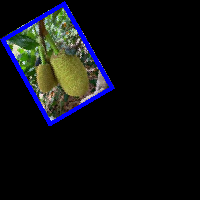

(8.5, 7.4)

In [22]:
target_x_variations = 5
target_y_variations = 5
canvas_size = (200, 200)
x_steps = abs(prev_im_copy.size[0] - canvas_size[0]) / target_x_variations
y_steps = abs(prev_im_copy.size[1] - canvas_size[1]) / target_y_variations
canvas = Image.new("RGB", canvas_size)
canvas.paste(prev_im_copy, (0, 0))
display(canvas)

x_steps, y_steps

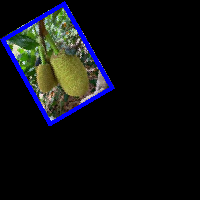

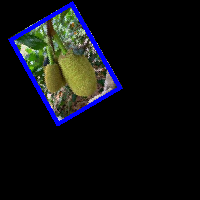

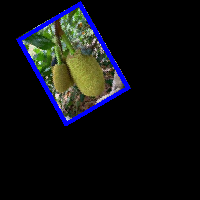

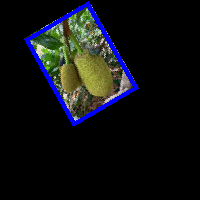

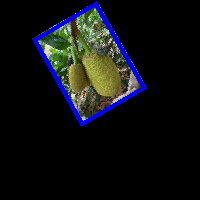

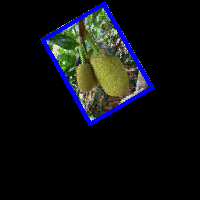

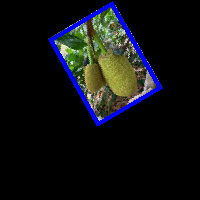

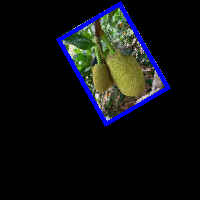

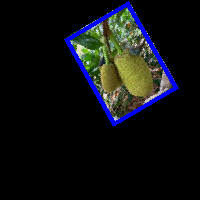

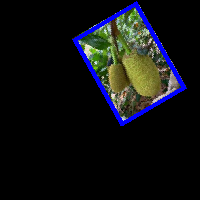

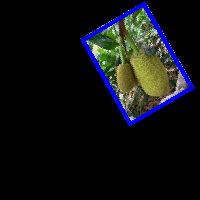

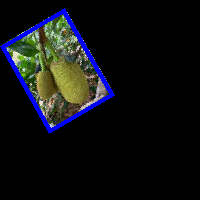

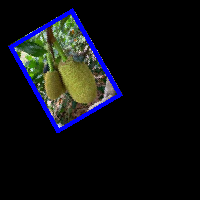

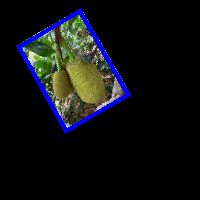

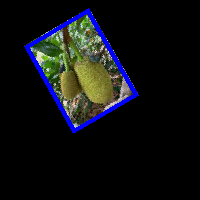

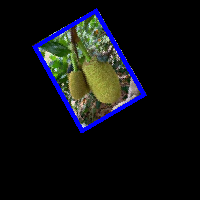

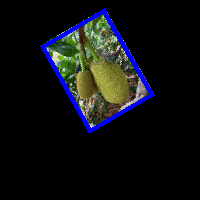

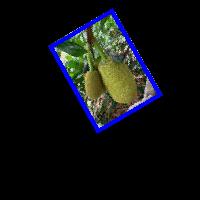

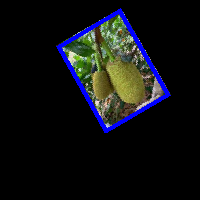

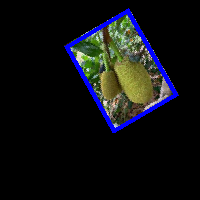

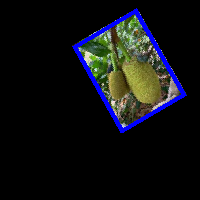

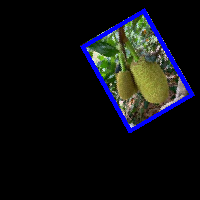

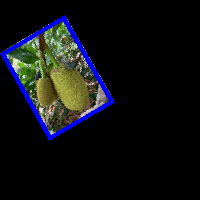

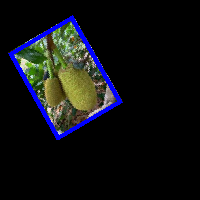

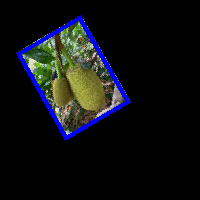

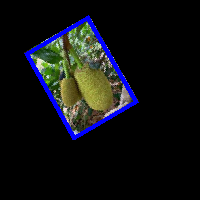

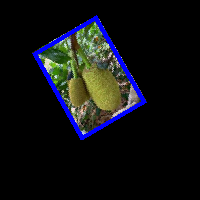

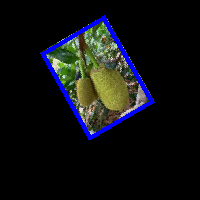

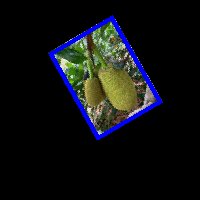

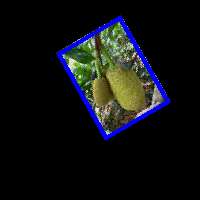

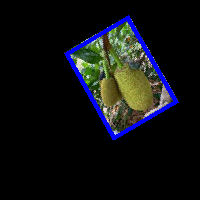

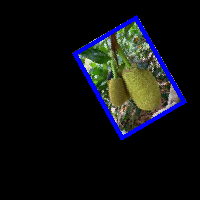

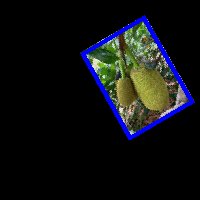

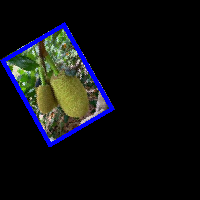

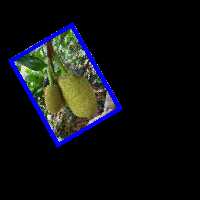

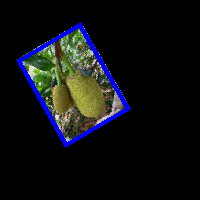

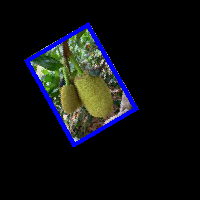

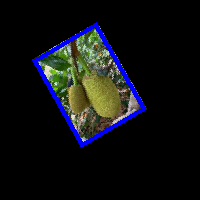

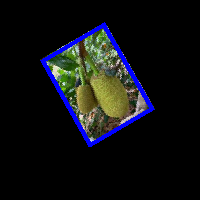

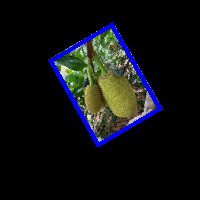

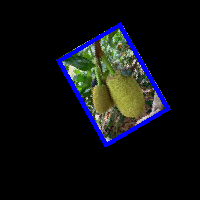

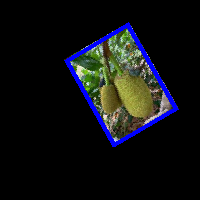

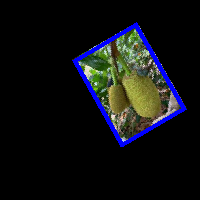

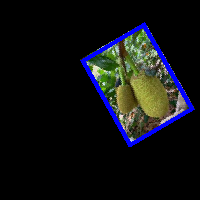

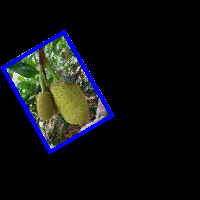

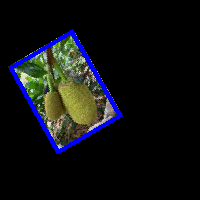

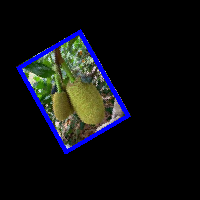

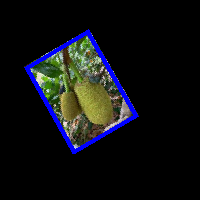

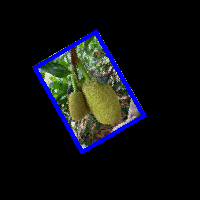

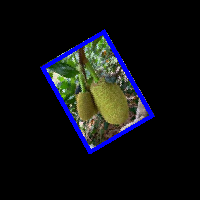

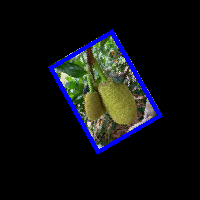

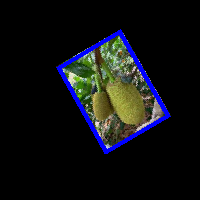

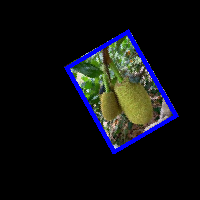

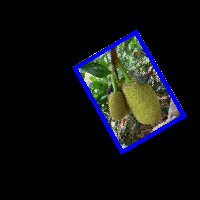

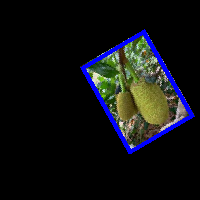

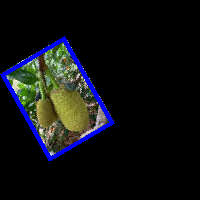

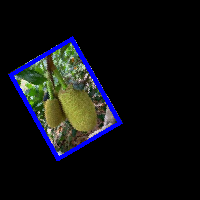

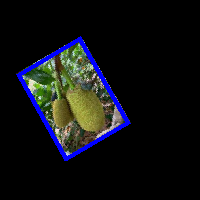

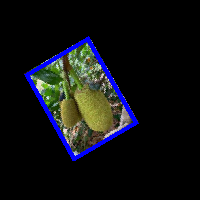

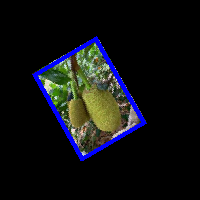

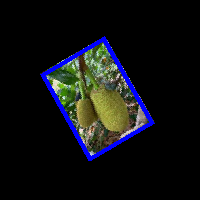

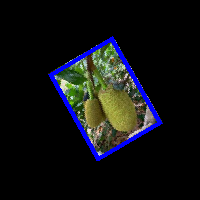

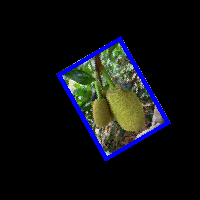

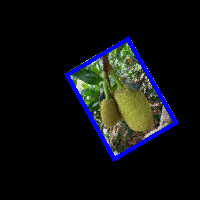

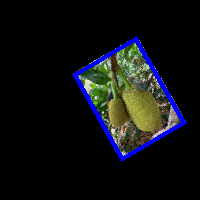

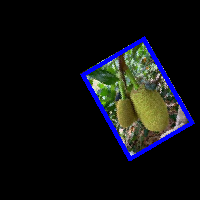

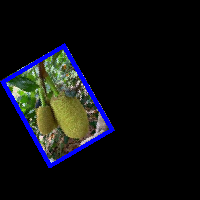

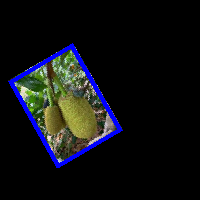

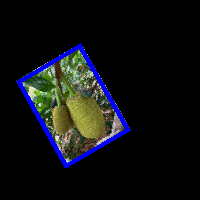

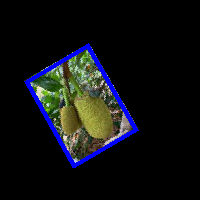

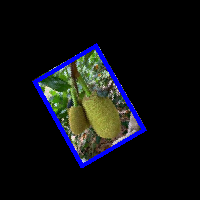

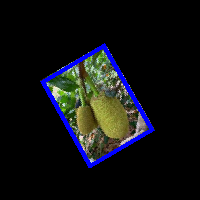

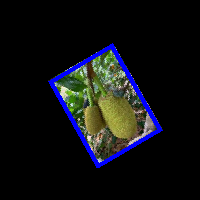

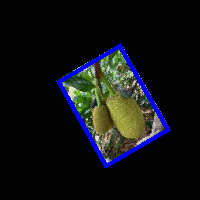

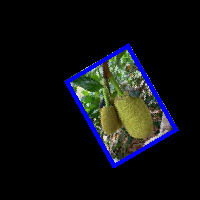

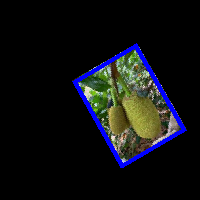

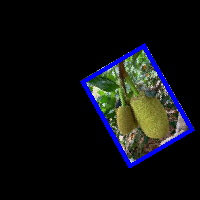

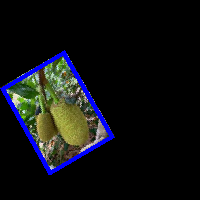

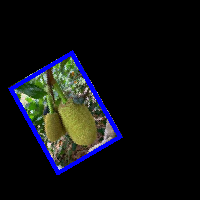

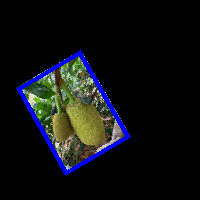

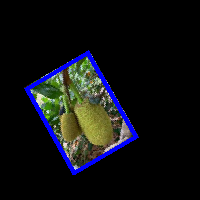

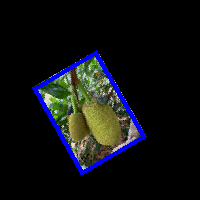

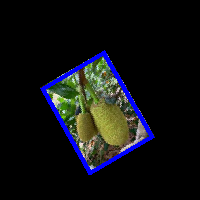

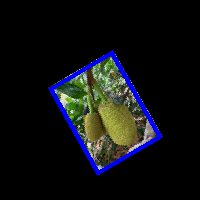

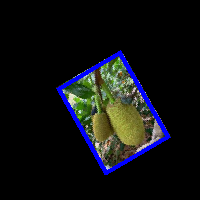

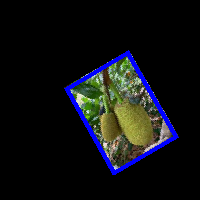

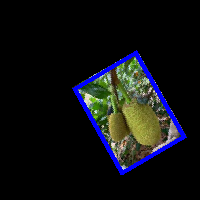

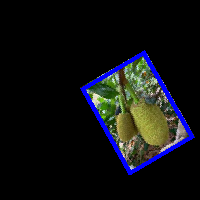

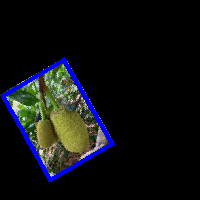

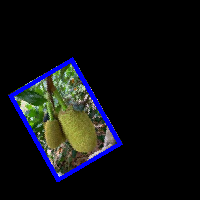

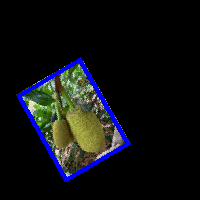

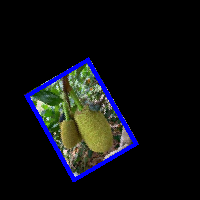

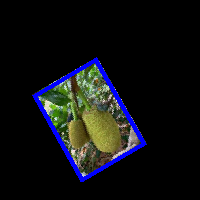

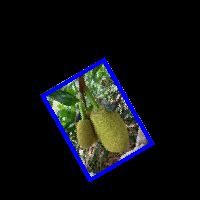

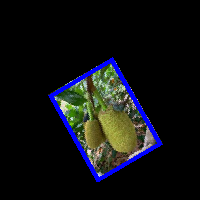

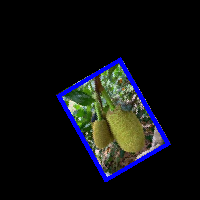

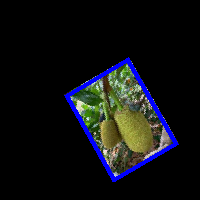

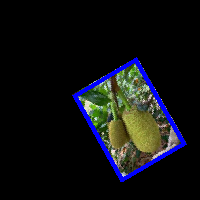

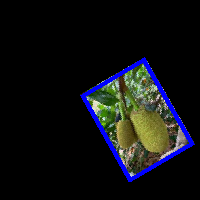

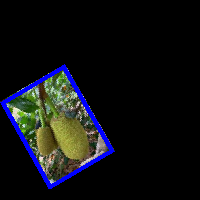

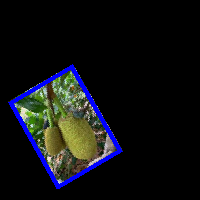

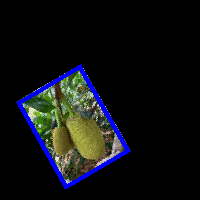

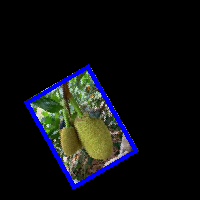

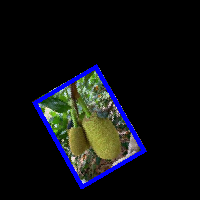

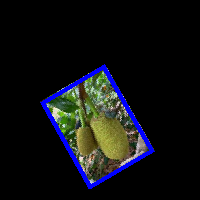

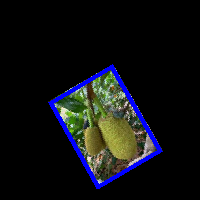

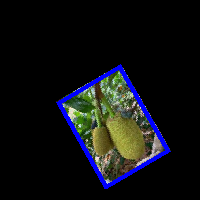

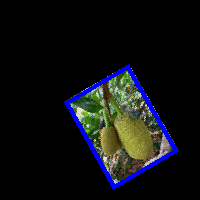

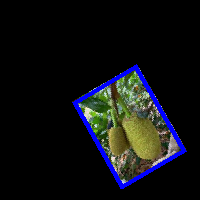

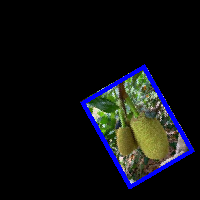

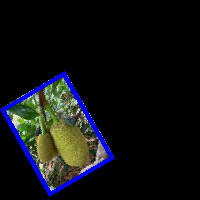

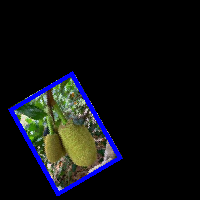

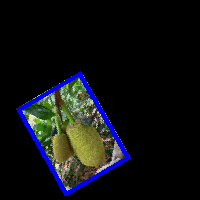

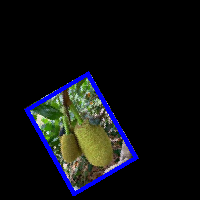

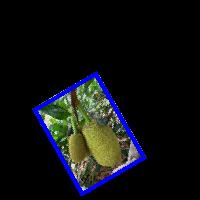

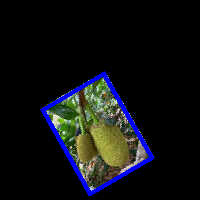

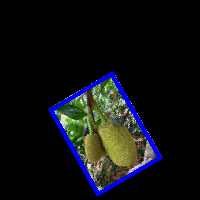

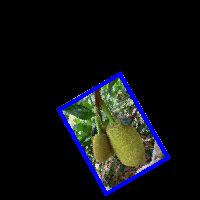

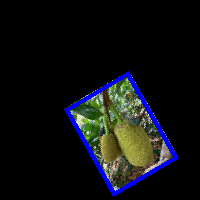

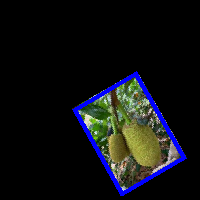

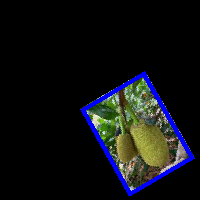

In [23]:
for y in range(target_y_variations + 1):
    for x in range(target_x_variations + 1):
        canvas2 = Image.new("RGB", canvas_size)
        canvas2.paste(prev_im_copy, (int(x_steps) * x, int(y_steps) * y))
        display(canvas2)

# x_variations * y_variations = 5 * 5 = 25
# angle diff = 10 -> 360 / 10 = 36 -> 36 * 25 = 900
# images per class = 50 * 900 = 45000
# number of classes = 10 * 45k = 450k        
